## As part of the [Spark Foundation internship](https://www.linkedin.com/company/the-sparks-foundation/), this project involves creating a Decision Tree classifier and visualizing it graphically. The classifier should be able to predict the right class of iris flowers when fed new data, showcasing the ability to handle intermediate-level machine learning tasks.

This project has been implemented by [Yaser Alshuaybat](https://www.linkedin.com/in/yaser-alshuaybat-611069268/)

<div style="border: 1px solid blue; padding: 10px; background-color: #e6f7ff;">
    <strong>Description:</strong> 
    <p>The goal of this project is to create a Decision Tree classifier and visualize it graphically. The purpose is to enable the classifier to predict the correct class when provided with new data, enhancing understanding and application of Decision Tree algorithms in machine learning.</p>

<strong>Task Submission:</strong>
<ol>
    <li>Host the code on a public GitHub repository. Record the code and output in a video and post it on YouTube.</li>
    <li>Share links to the code (GitHub) and the video (YouTube) as a post on your LinkedIn profile.</li>
    <li>Submit the LinkedIn link in the Task Submission Form when shared.</li>
    <li>Read the FAQs on how to submit the tasks.</li>
</ol>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [184]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [185]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### All data types matches what we excpect.
#### The Id column will be dropped.

In [186]:
iris = iris.drop('Id',axis=1)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [187]:
iris.isna().any() # No null values

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [188]:
iris.duplicated().sum() # 3 duplicated rows

3

In [189]:
iris = iris.drop_duplicates() # Dropping duplicates

In [190]:
iris.duplicated().sum() # No duplicates 

0

In [191]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### When inspecting at the minimum values, there is no sign of 0 lengths among them as a length can't be 0 physically.

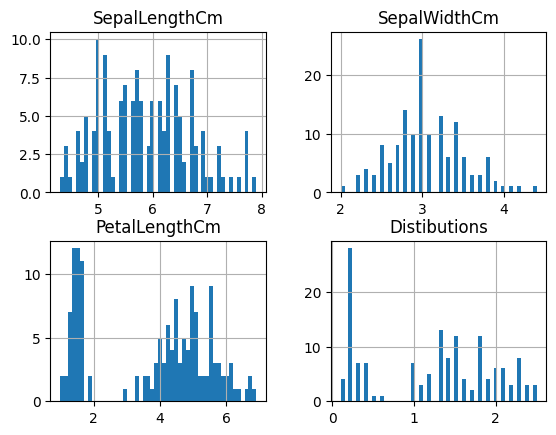

<Figure size 640x480 with 0 Axes>

In [192]:
iris.hist(bins=50)
plt.show()
plt.clf()

#### Histograms
The histograms display the distribution of each numerical feature in the Iris dataset. These plots provide insights into the range, frequency, and skewness of the data:
- **SepalLengthCm:** Shows a relatively normal distribution with a slight skew to the right. Most values are concentrated between 5 and 7 cm.
- **SepalWidthCm:** Displays a more varied distribution with a peak around 3 cm. There is noticeable skewness to the left.
- **PetalLengthCm:** Exhibits a bimodal distribution with two distinct peaks, reflecting the differences between species.
- **PetalWidthCm:** Also shows a bimodal distribution with clear separation between species.


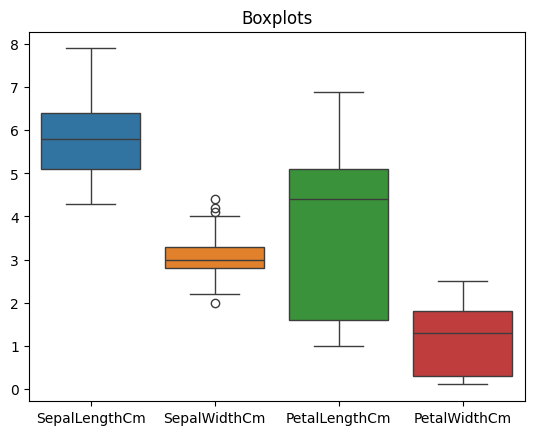

<Figure size 640x480 with 0 Axes>

In [193]:
sns.boxplot(data = iris)
plt.title('Boxplots')
plt.show()
plt.clf()

#### Boxplots
The boxplots summarize the distribution of each numerical feature, highlighting the median, quartiles, and potential outliers in the Iris dataset:
- **SepalLengthCm:** The median is around 5.8 cm, with a few outliers below the lower whisker indicating shorter sepal lengths.
- **SepalWidthCm:** The median is around 3 cm. There are several outliers on both ends, indicating variability in sepal width.
- **PetalLengthCm:** The median is around 4.5 cm. This feature has the largest interquartile range (IQR), reflecting greater variability among the species.
- **PetalWidthCm:** The median is around 1.3 cm, with a few outliers indicating smaller petal widths.


In [194]:
iris.Species.value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

C:\Users\yasee\AppData\Local\Temp\ipykernel_34464\2605837992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species',data = iris,palette='viridis')


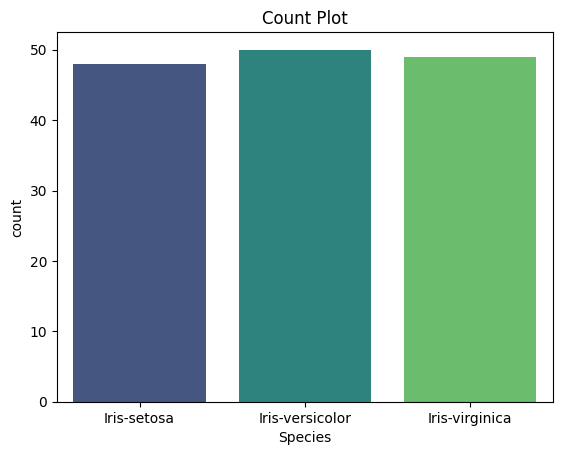

<Figure size 640x480 with 0 Axes>

In [195]:
sns.countplot(x='Species',data = iris,palette='viridis')
plt.title('Count Plot')
plt.show()
plt.clf()

#### explain

## Simple EDA:
1- Looking at the correlations between quantitive features.

2- Utilizing an ANOVA test to understand to test associations.

In [196]:
q = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris_c = iris[q]
corr_matrix = iris_c.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


### Checking Associations
<div class="alert alert-block alert-info">
<b>Association:</b>
<ol>
  <li>When testing the association between numerical variables and a non-binary categorical target variable, an ANOVA test is used to determine if there are statistically significant differences among the group means of the categorical variable.</li>
  <li>Extra: if the ANOVA test indicates significance, implying that at least one group mean differs, Tukey’s HSD test is then conducted to identify which specific group means differ from each other.</li>
</ol>


-----------------------------

> **A Basic Null Hypothesis (ANOVA):**
    - All group means are the same across the different categories of the target variable.

> **A Basic Alternative Hypothesis (ANOVA):**
    - Not all group means are the same across the different categories of the target variable.


------------------------------------
(Another explanation from [GeeksForGeeks](https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/))Hypothesis involved:
A one-way ANOVA has the below given null and alternative hypotheses:

>H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal).

>H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest.


In [197]:
def run_anova(df, target):
    # A Simple NAN check
    if df.isnull().values.any():
        print("The dataset contains NaN values. Please handle them before running ANOVA.")
        return

    anova_results = {}

    # Picking the quantitive columns
    numeric_columns = df.select_dtypes(include=['float64']).columns

    for feature in numeric_columns:
        # The data that will be fed into the test consists of the values of the numerical features across different categories (species)
        # For each feature, we compare the means of the feature values across the different species
        groups = [df[df[target] == category][feature] for category in df[target].unique()]

        # Ensure that all groups have data
        if any(len(group) == 0 for group in groups):
            print(f"One of the groups for {feature} is empty. Please check the data.")
            anova_results[feature] = {'p-value': float('nan')}
            continue

        # Perform ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        anova_results[feature] = {'p-value': p_value}

    return anova_results

results = run_anova(iris, 'Species')
results

{'SepalLengthCm': {'p-value': 7.530911607751836e-31},
 'SepalWidthCm': {'p-value': 1.1503376457787159e-16},
 'PetalLengthCm': {'p-value': 8.180545708674714e-89},
 'PetalWidthCm': {'p-value': 1.3529729471552775e-82}}

# ANOVA Results Summary

### For context: each variable is tested against the target variable individually, the results have been combined into one dictionary only for presentation.

The ANOVA tests conducted on various features against `Species` have yielded the following insights:

- **Sepal Length:** Significant differences (p-value ≈ 7.53e-31)
- **Sepal Width:** Significant differences (p-value ≈ 1.15e-16)
- **Petal Length:** Significant differences (p-value ≈ 8.18e-89)
- **Petal Width:** Significant differences (p-value ≈ 1.35e-82)

These results indicate that all features show significant differences between the species.

## Interpretation

- The data for the ANOVA test consists of the values of the numerical features across different species.
- Each ANOVA test compares the means of a numerical feature (e.g., Sepal Length) across the different species.
- The significant p-values indicate that there are significant differences in the means of the numerical features between the species.
- This means that for a given feature, at least one species has a mean value that is significantly different from the others.

### Explanation of p-value

- A p-value is the probability of obtaining test results at least as extreme as the observed results, assuming that the null hypothesis is correct.
- Typically, a significance level (alpha) of 0.05 is used to determine statistical significance.
- If the p-value is less than 0.05, you reject the null hypothesis and conclude that there are significant differences between the group means.
- In your results, all p-values are much smaller than 0.05, indicating significant differences in means for all features between the species.

## Post-Hoc Analysis

Tukey's HSD test reveals which specific groups (species) differ in terms of each feature:

- Detailed results for each feature are provided in the output above.

In [198]:
# for a simple tukey's range test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

numeric_columns = iris.select_dtypes(include=['float64']).columns

for feature in numeric_columns:
    print(f"Post-hoc analysis for {feature}:")
    tukey = pairwise_tukeyhsd(iris[feature], iris['Species'], alpha=0.05)
    print(tukey, '\n')

Post-hoc analysis for SepalLengthCm:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper  reject
-------------------------------------------------------------------
    Iris-setosa Iris-versicolor   0.9256   0.0 0.6788 1.1724   True
    Iris-setosa  Iris-virginica   1.5937   0.0 1.3456 1.8417   True
Iris-versicolor  Iris-virginica   0.6681   0.0 0.4226 0.9136   True
------------------------------------------------------------------- 

Post-hoc analysis for SepalWidthCm:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    Iris-setosa Iris-versicolor  -0.6612    0.0 -0.8245  -0.498   True
    Iris-setosa  Iris-virginica  -0.4517    0.0 -0.6157 -0.2876   True
Iris-versicolor  Iris-virginica   0.2096 0.0075  0.0472  0.3719   True
-----------------------

#### When inspecting each feature individually, we find that there is a significant difference between all pairs of species for that specific feature.
--------------------

## Decision Tree model 

> This project focuses on the use of a decision tree model to classify each species and then to graphically visualizing it.

In [199]:
# Encoding the species as numbers

"""
Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64
"""

iris['Species'] = iris.Species.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [200]:
print(iris.Species.unique())

[0 1 2]


Accuracy: 0.93


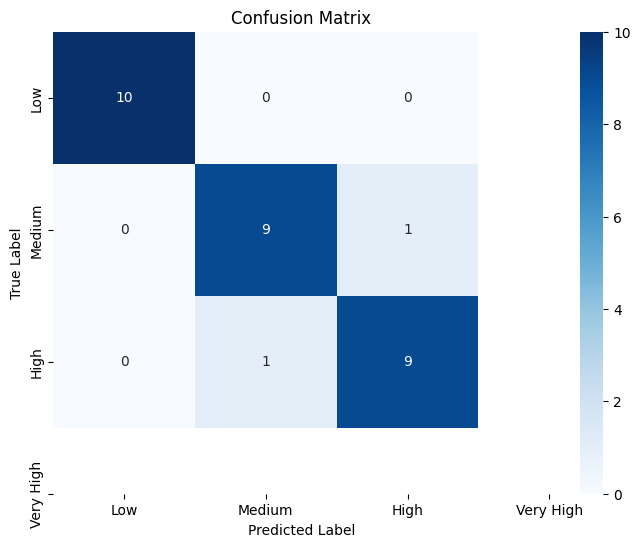

In [201]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Split the dataset into features (X) and target (y)
X = iris.drop(columns=['Species'])
y = iris['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
# Just for more understanding, the numbers have been mapped to text
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Interpretation of the Confusion Matrix
``Main Diagonal`` (TP and TN): The numbers on the main diagonal from top-left to bottom-right represent the true positives (TP) for each class. These are the instances where the predicted price range matches the actual price range. High values here indicate good model performance.

``Off-Diagonal`` (FP and FN): Values off the main diagonal indicate errors. The rows represent the actual classes, while the columns represent the predictions. For instance, if the 'Low' row has numbers in any column other than the 'Low' column, those are false negatives (FN) for the 'Low' class, indicating instances where a 'Low' price phone was incorrectly classified into a different category.

``Overall Assessment`` : High numbers on the diagonal in comparison to the off-diagonals across all classes indicate good model accuracy. However, you should also consider precision (correct predictions out of all predictions for that class) and recall (correct predictions out of all actual instances of that class) for a balanced evaluation.

--------------------------------

True Positives (TP): The count of correct positive predictions (model correctly predicts the positive class).
True Negatives (TN): The count of correct negative predictions (model correctly predicts the negative class).
False Positives (FP): The count of incorrect positive predictions (model incorrectly predicts the positive class).
False Negatives (FN): The count of incorrect negative predictions (model incorrectly predicts the negative class).

--------------------------------

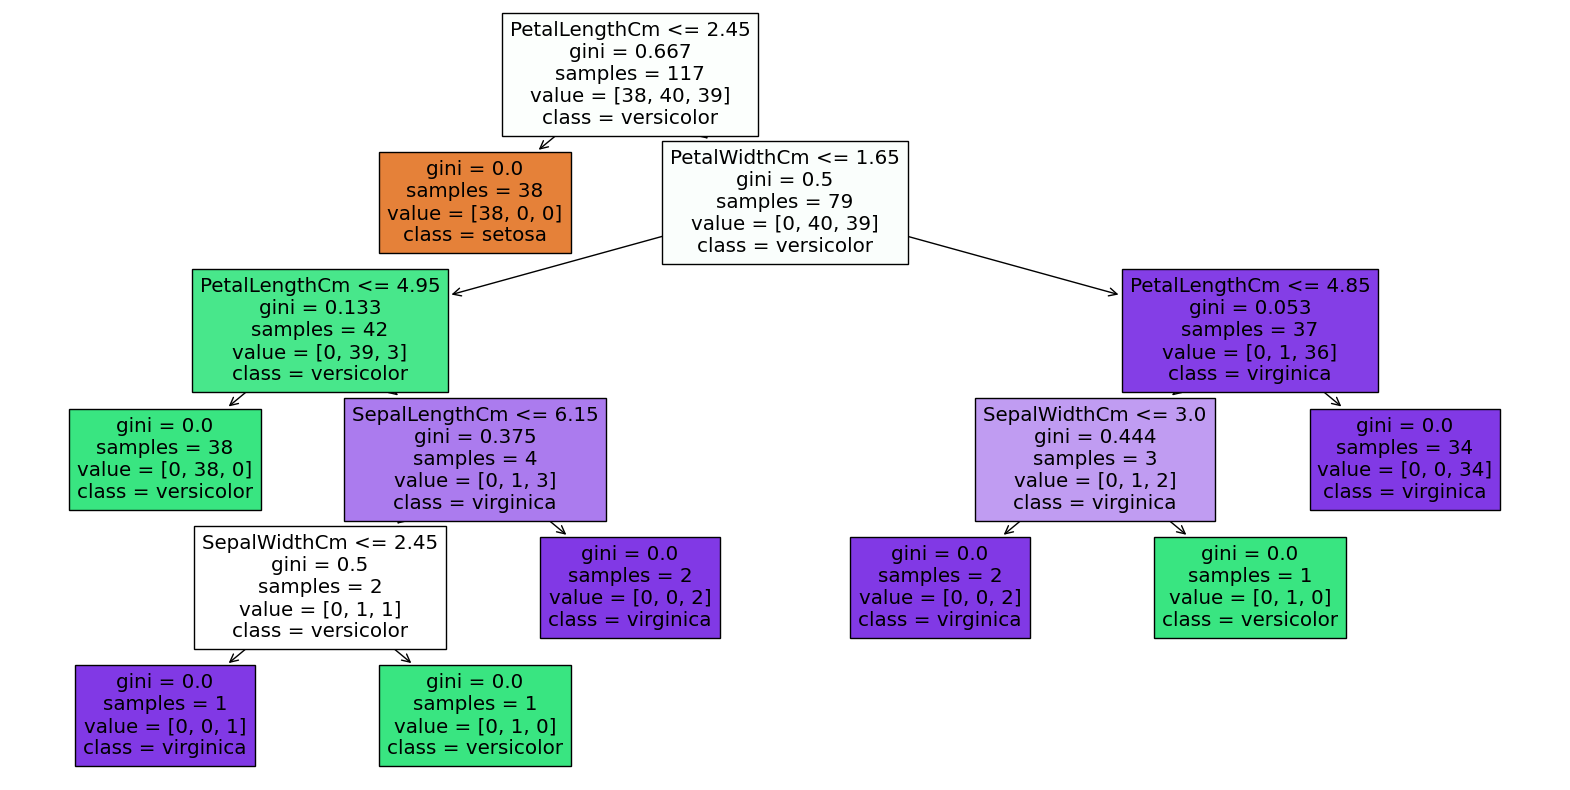

In [202]:
# Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica']) # class names in the same order
plt.show()

# How to Interpret a Decision Tree Plot

A decision tree is a visual representation used for classification and regression tasks. Here's a simple guide to understanding its components:

## Root Node
- The topmost node in the tree.
- Represents the first decision based on a specific feature and its threshold.
- Example: `PetalLengthCm <= 2.45`

## Internal Nodes
- Represent decisions or tests on specific features.
- Each node provides:
  - **gini:** Gini impurity, measuring the quality of the split (lower is better).
  - **samples:** Number of samples at that node.
  - **value:** Distribution of samples across different classes.
  - **class:** The most frequent class at that node.

## Branches
- Connect nodes and represent the outcomes of tests.
- Example: One branch for `PetalLengthCm <= 2.45` being true, another for false.

## Leaf Nodes
- Final nodes that do not split further.
- Represent the outcome or class label.
- Each leaf node provides:
  - **gini:** Gini impurity (ideally 0).
  - **samples:** Number of samples at that leaf.
  - **value:** Distribution of samples across different classes.
  - **class:** Predicted class label for the samples at that leaf.

## Example Breakdown

### Root Node
- `PetalLengthCm <= 2.45`
- `gini = 0.667`
- `samples = 117`
- `value = [38, 40, 39]`
- `class = versicolor`

### First Split
- If `PetalLengthCm <= 2.45`:
  - Left branch:
    - `gini = 0.0`
    - `samples = 38`
    - `value = [38, 0, 0]`
    - `class = setosa`
- If `PetalLengthCm > 2.45`:
  - Right branch:
    - `PetalWidthCm <= 1.65`
    - `gini = 0.5`
    - `samples = 79`
    - `value = [0, 40, 39]`
    - `class = versicolor`

### Subsequent Splits and Leaves
- Each internal node represents a decision.
- Each leaf node represents a final classification.
- Splits aim to reduce impurity and create more homogeneous branches.

## Visualization Tips
- **Color Coding:** Nodes are color-coded based on the predicted class.
- **Depth and Complexity:** Shallower trees are simpler but may underfit; deeper trees are more complex and may overfit.
- **Impurity Measures:** Lower impurity values at leaves indicate more confident classifications.

By following these steps, you can interpret the decision paths taken by the model to classify or predict outcomes for given data points.


In [203]:
from sklearn.model_selection import cross_val_score

# Initialize the decision tree classifier
DTC = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(DTC, X, y, cv=10)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {mean_cv_score:.2f}")
print(f"Standard deviation of cross-validation score: {std_cv_score:.2f}")

Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.92857143 1.         1.        ]
Mean cross-validation score: 0.95
Standard deviation of cross-validation score: 0.04


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test set accuracy: 0.97


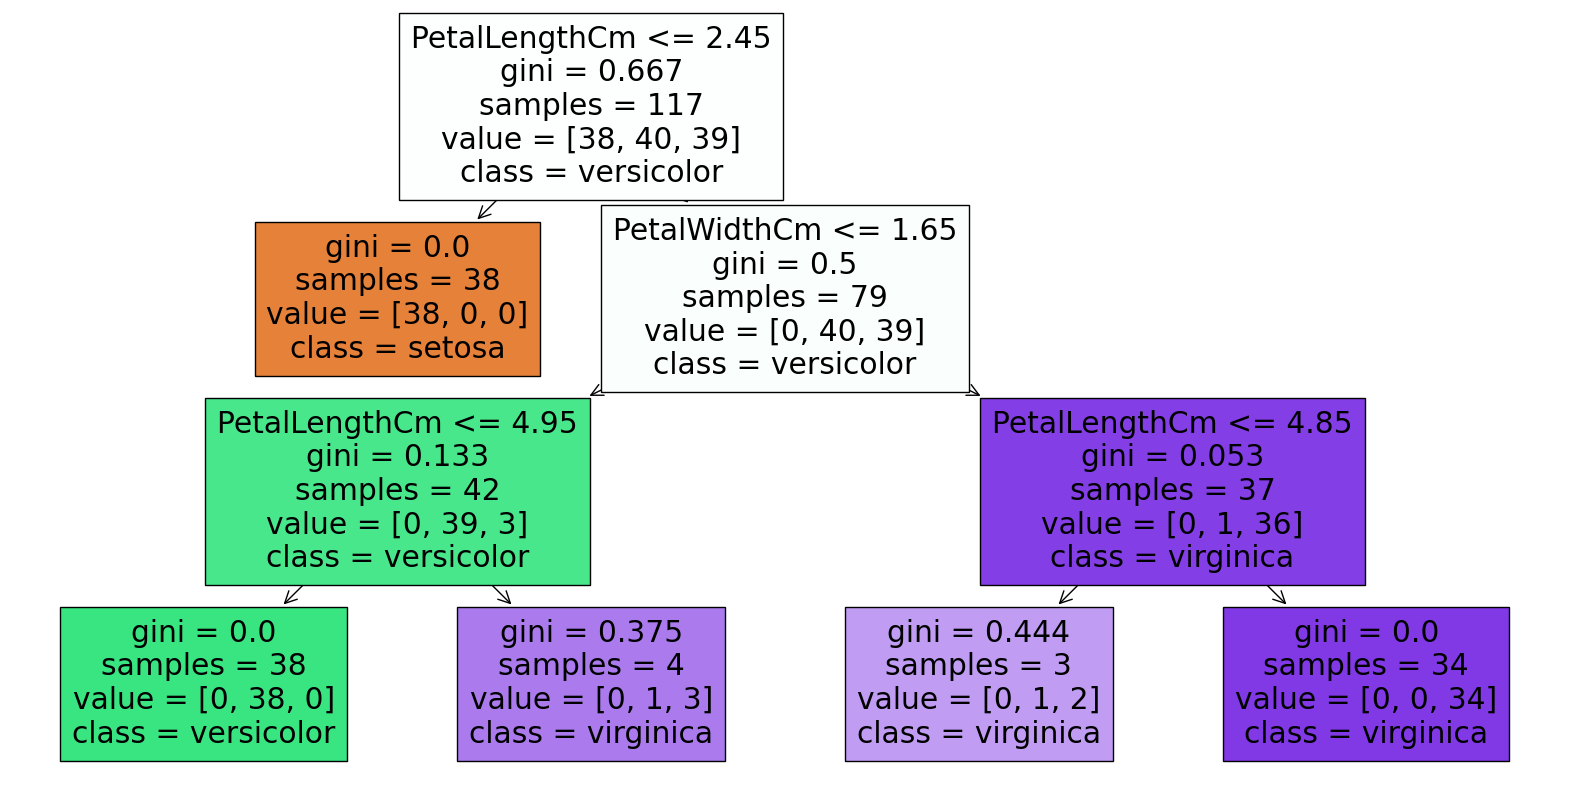

In [204]:
# You can use GridSearchCV since the number of features is not huge.

dtc = DecisionTreeClassifier(random_state=42)

# Parameter Grid
param_grid = {
    'max_depth': [1, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the best model on the test data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Visualizing the best decision tree
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica'])
plt.show()
